In [10]:
import requests 
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re

In [11]:
query = '부동산+대책'
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+query 

urls_list = [] #기사 url 담을 list

In [12]:
for i in range(4): #0~4=> 5페이지까지
    url=url+"&start="+str(i*10+1) 

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"): # 네이버 기사만 담기
            urls_list.append(urls["href"])

# len(urls_list)

In [13]:


from selenium import webdriver

from bs4 import BeautifulSoup

import time


driver = webdriver.Chrome('./chromedriver') 
comments=[] #댓글들 담을 list
for url in urls_list:
    try:
        print(url+' 크롤링중')
        driver.get(url+'&m_view=1&includeAllCount=true') #댓글 페이지
        time.sleep(3) #댓글 불러오는 거 기다리기

        try:
            for i in range(0, 2) : #댓글 더보기 2페이지만
                driver.find_element_by_css_selector(".u_cbox_btn_more").click() #댓글 더보기 클릭
                time.sleep(3)
                i +=1



            html = driver.page_source

            bs = BeautifulSoup(html, 'html.parser')
        
            contents = bs.find_all("span", {"class" : "u_cbox_contents"}) #댓글 담긴 span tag 찾기
            for content in contents :
                comments.append(content.text)

        except: 
            print("댓글 2페이지까지 없어")
    except:
        print("없는 url")

print(comments)



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=055&aid=0000779436 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=014&aid=0004344799 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=215&aid=0000832238 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=025&aid=0002961267 크롤링중
댓글 2페이지까지 없어
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=023&aid=0003494200 크롤링중
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=001&aid=0011283042 크롤링중
댓글 2페이지까지 없어
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=004&oid=214&aid=0001001360 크롤링중
댓글 2페이지까지 없어
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=056&aid=0010774336 크롤링중
댓글 2페이지까지 없어
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=028&aid=0002478636 크롤링중
댓글 2페이지까지 없어
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=047&aid=0002250186 크롤링중
https://news.naver.com/ma

In [14]:
len(comments) #댓글 수

1267

In [15]:
comments_str=" ".join(comments) #댓글 string으로

comments_str

'서울시상 급여는 최저임수준으로 낮추어야합니다.박원순시장 말고도  잘 할사람 많습니다. 10년 가까운 세월동안 서울시 경쟁력 망가트린 못난이 그런대도 시장 노릇을 하고 있으니 이게 서울의 민도인가... 하기사 지방선거 대부분이 북풍 영향 받아 싹쓸이 좌파세상으로 변했지. 아들이나 찾아라 이것아.. 뭔 애비가 자식 어디 있는지 모른다 시침이를 떼는것인지. 사회주의화 되는 서울시를 더는 못 보것다 김현미장관과 비슷하게 시장을 잘못 파악하고 있구먼... 그런 식견으로 무슨 대권을 넘보시나? 시골내려가셔서 이장님 하시면 딱인데... 왜 차라리 몰수해서 정은이에게 바치지 시민의 혈세를 물쓰듯 펑펑 쓰는 박원순 시장은 퇴진하라. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ지는 재산 다 돌려놓고 마이너스라고 저지랄하네 재산이 마이너스인데 어찌 그리 고급품만 갖고 사냐?그리고 아들새끼 유학은 어떻게 보냈냐? 아직도 아들 못찾았어? 니 아들 어딨냐고?? 군면제 받으려고 남의 엑스레이 제출한 니 아들 었다 빼돌렸는데??? 끌고와.당장! 너같은위선적인종자 새키가뮌소릴못하냐  그세금걷어서  너처럼세금을  물쓰듯이 하는놈은 후에 그댓가을 톡톡히받아야한다 시장님! 시장님에 의하여 서울에 재건축 재개발 아파트를 35층으로 규제하여 (깍두기 아파트 규제) 부동산 가격 폭등을 만드는데 일조했습니다. 공정하고 공평한 세금인상도 필요하지만 규제를 파기히여 고층을 건설 공급량 증가도 검토대상입니다. 종부세 3배. 완전 ㅁㅊ네. 그럼 처음부터 아파트 가격을 잘 조정하지. 왜 뒷북치지. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 사회주의가 정권을 잡으면 하향평준화로 고만고만해진다이게 좋나 기회만 공정하면되지 왜 결과가 공정해야하지 북한인가 북한이 좋으면 제발그리로 가라 좌파놈들 세금 뜯어내서 국민은 가난하게 만들은 ㄱ지들이 펑펑 쓰며 해처먹는 거 다 안다. 경제효과는? 나라 점점 더 가난해짐. 박원순이 지난 12년간 서울에 뭔 짓을 했는지 서울은 점점 퇴보하는데 집값만 폭등함 기생충들만 살찌고 국민은 점점가난해 지는 아이러니 지 책임

In [16]:
# comments_str 저장
save=open("comments.txt", 'w' , encoding='utf-8' )
save.write(comments_str)
save.close()

# comments_str 저장
save=open("naver_comments.txt", 'w' , encoding='utf-8' )
save.write(comments_str)
save.close()

In [1]:
# comments_str 불러오기
with open('naver_comments.txt', 'r', encoding= 'utf-8') as f: 
    doc = ''  # 리뷰 데이터를 담기 위한 String 변수 생성
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    for line in lines:  # for문을 통해 lines에 있는 모든 텍스트를 doc2에 이어 붙임
        doc += line

In [2]:
doc

'서울시상 급여는 최저임수준으로 낮추어야합니다.박원순시장 말고도  잘 할사람 많습니다. 10년 가까운 세월동안 서울시 경쟁력 망가트린 못난이 그런대도 시장 노릇을 하고 있으니 이게 서울의 민도인가... 하기사 지방선거 대부분이 북풍 영향 받아 싹쓸이 좌파세상으로 변했지. 아들이나 찾아라 이것아.. 뭔 애비가 자식 어디 있는지 모른다 시침이를 떼는것인지. 사회주의화 되는 서울시를 더는 못 보것다 김현미장관과 비슷하게 시장을 잘못 파악하고 있구먼... 그런 식견으로 무슨 대권을 넘보시나? 시골내려가셔서 이장님 하시면 딱인데... 시민의 혈세를 물쓰듯 펑펑 쓰는 박원순 시장은 퇴진하라. 왜 차라리 몰수해서 정은이에게 바치지 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ지는 재산 다 돌려놓고 마이너스라고 저지랄하네 재산이 마이너스인데 어찌 그리 고급품만 갖고 사냐?그리고 아들새끼 유학은 어떻게 보냈냐? 아직도 아들 못찾았어? 정권 빨리 바뀌었음 좋겠다. 온 나라가 혼란 뒤숭숭..정치 경제 안보 민생 불안하고 바람잘날 없네. 못살겠다 진짜 사회주의가 정권을 잡으면 하향평준화로 고만고만해진다이게 좋나 기회만 공정하면되지 왜 결과가 공정해야하지 북한인가 북한이 좋으면 제발그리로 가라 좌파놈들 세금 뜯어내서 국민은 가난하게 만들은 ㄱ지들이 펑펑 쓰며 해처먹는 거 다 안다. 경제효과는? 나라 점점 더 가난해짐. 박원순이 지난 12년간 서울에 뭔 짓을 했는지 서울은 점점 퇴보하는데 집값만 폭등함 기생충들만 살찌고 국민은 점점가난해 지는 아이러니 민주당인사들은 말만 번지르르하고 서민들 위하는척하지만 하는거보면  한국당놈들보다 더 교활하고 악랄해....... 미세먼지 잡는다고 160억 세금을 3일 무료교통으로 쓴 인간머리에서나 나올법한 얘기네 집값폭등은 공감합니다만 해법은 사회주의생각같아 씁쓸합니다.  정책당국자의 잘못이지 서울에 집갖고 사는사람이 무슨죄를 지었나요? 취,등록세는 OECD평균보다 5배 높다고합니다. 그럼 5배 인하해서, 평균정도라도 맞춰야하는거 아닌가요?내릴거부터 내리고, 올려야하는거

In [3]:
from collections import Counter
from konlpy.tag import Twitter

twitter = Twitter()
raw_pos_tagged = twitter.pos(doc, norm=True, stem=True)

raw_pos_tagged

/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('서울시', 'Noun'),
 ('상', 'Suffix'),
 ('급여', 'Noun'),
 ('는', 'Josa'),
 ('최저', 'Noun'),
 ('임', 'Noun'),
 ('수준', 'Noun'),
 ('으로', 'Josa'),
 ('낮추다', 'Verb'),
 ('야하다', 'Adjective'),
 ('.', 'Punctuation'),
 ('박원순', 'Noun'),
 ('시장', 'Noun'),
 ('말고도', 'Josa'),
 ('자다', 'Verb'),
 ('하다', 'Verb'),
 ('사람', 'Noun'),
 ('많다', 'Adjective'),
 ('.', 'Punctuation'),
 ('10년', 'Number'),
 ('가깝다', 'Adjective'),
 ('세월', 'Noun'),
 ('동안', 'Noun'),
 ('서울시', 'Noun'),
 ('경쟁력', 'Noun'),
 ('망', 'Noun'),
 ('가트', 'Noun'),
 ('린', 'Noun'),
 ('못난이', 'Noun'),
 ('그런', 'Modifier'),
 ('대도', 'Noun'),
 ('시장', 'Noun'),
 ('노릇', 'Noun'),
 ('을', 'Josa'),
 ('하다', 'Verb'),
 ('있다', 'Adjective'),
 ('이', 'Noun'),
 ('게', 'Josa'),
 ('서울', 'Noun'),
 ('의', 'Josa'),
 ('민', 'Noun'),
 ('도인', 'Noun'),
 ('가', 'Josa'),
 ('...', 'Punctuation'),
 ('하다', 'Verb'),
 ('지방선거', 'Noun'),
 ('대부분', 'Noun'),
 ('이', 'Josa'),
 ('북풍', 'Noun'),
 ('영향', 'Noun'),
 ('받다', 'Verb'),
 ('싹', 'Noun'),
 ('쓸다', 'Verb'),
 ('좌파', 'Noun'),
 ('세상', 'Noun'),
 ('으로', 'Josa'),


In [4]:
# test_str='완전 위해 절대 그게 아무'
# test=twitter.pos(test_str, norm=True, stem=True)
# print(test)

In [5]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다','어떻다','ㅋㅋ','ㅋㅋㅋ','ㅠㅠ','ㅉㅉ','ㅎㅎ','없다','위해','완전','절대','그게','아무','건가','나다','모두','이미','저런','같다'] #삭제할 것들
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign","Adverb","Suffix"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            if(word[0].isalpha()): #숫자 뺌
                word_cleaned.append(word[0])


word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

sorted_word_dic

[('세금', 588),
 ('부동산', 464),
 ('사람', 333),
 ('정책', 300),
 ('집값', 291),
 ('올리다', 270),
 ('국민', 244),
 ('서울', 242),
 ('시장', 239),
 ('정부', 231),
 ('살다', 221),
 ('보다', 206),
 ('정권', 199),
 ('주택', 197),
 ('종부세', 186),
 ('투기', 178),
 ('생각', 177),
 ('지다', 176),
 ('박원순', 167),
 ('믿다', 154),
 ('오르다', 152),
 ('아파트', 145),
 ('들다', 143),
 ('잡다', 140),
 ('나라', 138),
 ('내다', 138),
 ('가다', 131),
 ('시키다', 131),
 ('만들다', 130),
 ('유세', 128),
 ('원숭이', 120),
 ('공급', 113),
 ('폭등', 111),
 ('하나', 110),
 ('서울시장', 110),
 ('들이다', 106),
 ('그냥', 105),
 ('시민', 103),
 ('인간', 101),
 ('쓰다', 100),
 ('국가', 100),
 ('알다', 96),
 ('걷다', 95),
 ('주다', 95),
 ('모르다', 91),
 ('이상', 90),
 ('야하다', 89),
 ('경제', 89),
 ('문재인', 89),
 ('대출', 88),
 ('신뢰', 88),
 ('넘다', 87),
 ('나오다', 87),
 ('뽑다', 85),
 ('누가', 84),
 ('치다', 83),
 ('진짜', 82),
 ('무슨', 80),
 ('좋다', 80),
 ('강남', 80),
 ('많다', 78),
 ('전세', 78),
 ('받다', 76),
 ('이제', 74),
 ('사회주의', 72),
 ('서민', 72),
 ('안되다', 71),
 ('때문', 70),
 ('사다', 69),
 ('가격', 69),
 ('맞다', 69),
 ('먹다', 68),
 ('규

In [6]:
# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내기
translation_target = sorted_word_dic[:100] 

In [7]:
translation_target = {}
for item in word_dic: #item에 키값 들어감
    if word_dic[item] >= 31: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어를 선정합니다.
        translation_target[item] = word_dic[item]

In [8]:
print(translation_target)


{'서울시': 58, '수준': 56, '야하다': 89, '박원순': 167, '시장': 239, '자다': 58, '사람': 333, '많다': 78, '서울': 242, '받다': 76, '좌파': 49, '아들': 64, '어디': 40, '모르다': 91, '사회주의': 72, '보다': 206, '잘못': 36, '무슨': 80, '넘다': 87, '시민': 103, '쓰다': 100, '지다': 176, '재산': 44, '갖다': 44, '사다': 69, '그리고': 50, '새끼': 48, '정권': 199, '좋다': 80, '나라': 138, '정치': 51, '경제': 89, '살다': 221, '진짜': 82, '잡다': 140, '결과': 36, '북한': 42, '제발': 41, '세금': 588, '뜯다': 50, '국민': 244, '만들다': 130, '들이다': 106, '먹다': 68, '집값': 291, '폭등': 111, '서민': 72, '한국': 48, '인간': 101, '머리': 36, '나오다': 87, '생각': 177, '정책': 300, 'OECD': 32, '평균': 40, '높다': 36, '정도': 46, '올리다': 270, '국가': 100, '걷다': 95, '재건축': 34, '재개발': 34, '아파트': 145, '규제': 68, '부동산': 464, '가격': 69, '인상': 52, '파다': 44, '끄다': 32, '빨갱이': 39, '종부세': 186, '하나': 110, '서울시장': 110, '찍다': 40, '싫다': 40, '다음': 36, '선거': 36, '가다': 131, '그냥': 105, '누가': 84, '때리다': 68, '이제': 74, '서다': 33, '공급': 113, '때문': 70, '정신': 31, '유세': 128, '정부': 231, '주택': 197, '투기': 178, '도세': 40, '거래': 56, '오르다': 152, '들다': 143,

In [9]:
#워드 클라우드
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

word_cloud = WordCloud(font_path="fonts/malgun.ttf", 
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [11]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

In [12]:
# # 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

# plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
# plt.imshow(word_cloud) # image show
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

In [13]:
# word_cloud.to_file("word_cloud.png")

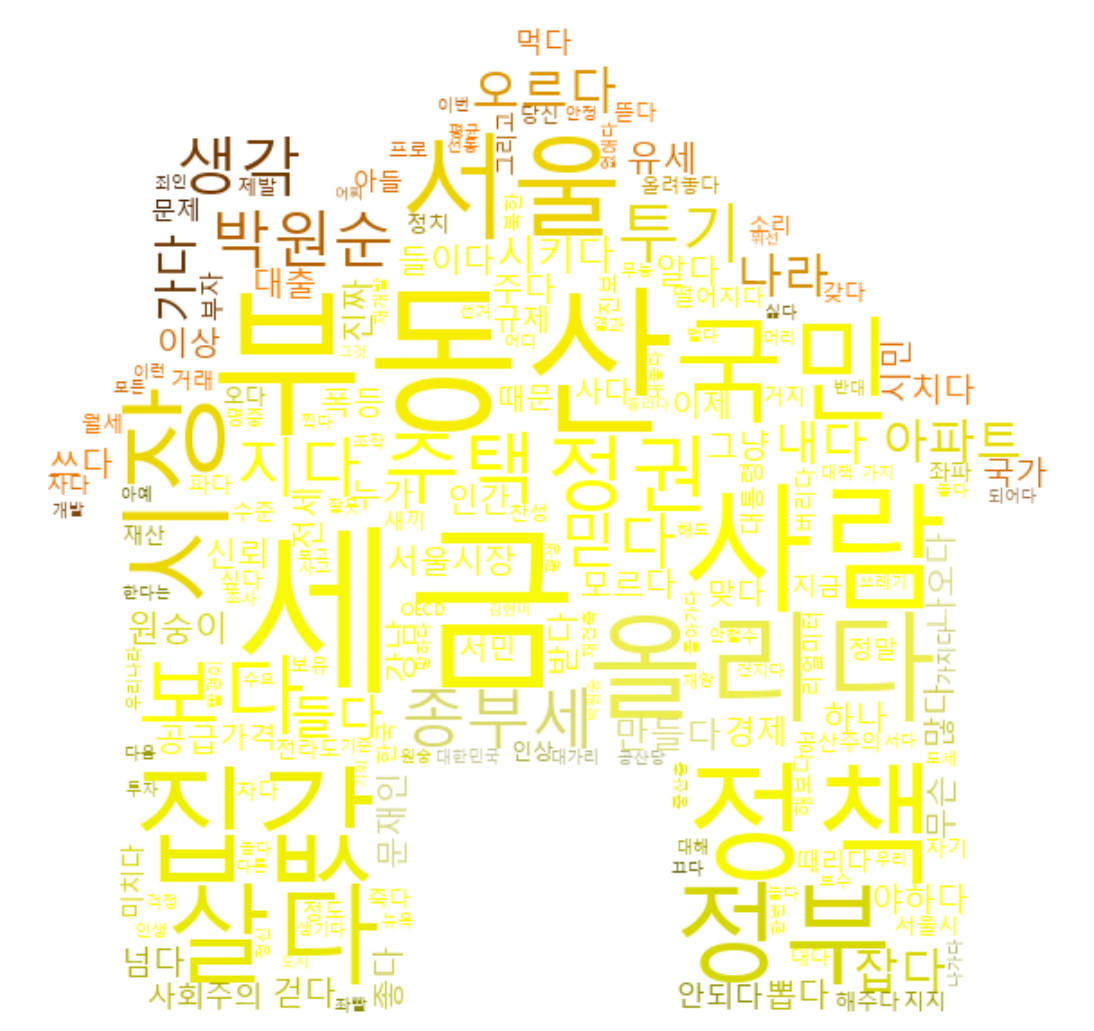

In [14]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

coloring = np.array(Image.open("./yellow-house.png"))
image_colors = ImageColorGenerator(coloring)

word_cloud = WordCloud(font_path="fonts/malgun.ttf", 
                       width=2000, height=1000,  
                       mask=coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
word_cloud.to_file("word_cloud_coloring.png")

In [16]:
# coloring = np.array(Image.open("./yellow-house.png"))
# image_colors = ImageColorGenerator(coloring)

# word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
#                        width=2000, height=1000,  
#                        mask=coloring, 
#                        background_color='white').generate(doc)

# plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
# plt.imshow(word_cloud) # image show
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()